Like Folium, Basemap is a library used to plot geopoints on a map. It is built on top of Matplotlib and is more popular that Folium. However, the maps generated from Basemap aren't as detailed and may look bland. It is howver good for showcasing plots spread over a large landmasses (like a province or country). Before pursuing this library, I'll show you some photos of what Basemap looks like to guide your decision. Personally I will never touch Basemap again (after finding Folio) but hey, for those who like more documentation this is the library for you.

![caption](canadian_forest_fires.png)

This one is in Northern Alberta
![caption](alberta_wind_farms.png)

### Installation
For those of you still here, lets start:

Matplotlib relies on a library called Basemap to plot geographic data on a map. you can see its documentation here:
https://matplotlib.org/basemap/users/intro.html

Basemap is quite difficult to install. Fortunately I've scoured the internet and found this command:

__mac & linux__

`conda install basemap`

If the above fails:

__mac:__

`brew install geos`

`sudo -H pip3 install https://github.com/matplotlib/basemap/archive/v1.1.0.tar.gz`

__linux:__

`sudo -H pip3 install https://github.com/matplotlib/basemap/archive/v1.1.0.tar.gz`


__windows:__

please consult me if you can't find a good solution online. sorry :p



After you've run that in the terminal you can import it in python!

In [13]:
import pandas as pd #Python's data manipulation library
import matplotlib.pyplot as plt #Python's graphing library
from mpl_toolkits.basemap import Basemap #The geomapping library built ontop of matplotlib

Lets read the pickle file we made in the previous tutorial.

In [9]:
geoRainfallDF = pd.read_pickle("../saved_dataframes/geoRainfallDF")

In [10]:
lats = geoRainfallDF["latitude"].values
lons = geoRainfallDF["longitude"].values

To make a Basemap projection you have to provide a lat lon coordinate specifying where the middle of the projection is. Then you'll specify a width and height diameter to "build" a window to show the projections. It'll make a lot more sense when you look at the code.

/home/splacorn/miniconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/home/splacorn/miniconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/splacorn/miniconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


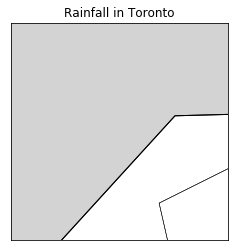

In [14]:
m = Basemap(projection='lcc', #this is the Lambert Conformal Conic projection
            resolution="c",
            width=100000., # we're specifying a width of 100,000 meters
            height=100000., # we're specifying a width of 100,000 meters
            lat_0=43.761539, # Toronto's lat coord
            lon_0=-79.411079) # Toronto's lon coord

m.fillcontinents(color='lightgray',zorder=0)
x, y = m(lats, lons)

m.scatter(x, y,0.05,color='r')
m.drawcoastlines()
m.drawstates() # not really nessesary but it's good to know that you can use this
m.drawcountries() # not really nessesary but it's good to know that you can use this
plt.title("Rainfall in Toronto")
plt.show()
plt.rcParams['savefig.dpi'] = 500

You can save basemap images just like regular matplotlib graphs. Try messing around with the _width_ and _height_ params of your Basemap object to get the right location.

I hope this can get you started. Goodluck!